## Data Preparation ( Load Data )

In [1]:
from google.colab import drive
# connect to Gdrive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Uas_Fix

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-b48fa0009124>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', 'gdrive/MyDrive/Uas_Fix')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interact

In [3]:
%ls

gdrive/  sample_data/


In [4]:
%cd gdrive/MyDrive/Uas_Fix

/content/gdrive/MyDrive/Uas_Fix


In [5]:
gender = 'gender/'
person = 'person/'
testing_image = 'test.jpeg'

 - My datasets : https://drive.google.com/drive/folders/1YaN--sAniWGAdqbkVgZJUxbUWwhCPs_A?usp=sharing

## Preprocessing Data

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
from PIL import Image

- Gender

In [7]:
generator_gender = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.3
)

In [8]:
train_dataset_gender=generator_gender.flow_from_directory(
    gender,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

Found 563 images belonging to 2 classes.


In [9]:
validation_dataset_gender=generator_gender.flow_from_directory(
    gender,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 240 images belonging to 2 classes.


- Person

In [10]:
generator_person = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    validation_split=0.3
)

In [11]:
train_dataset_person=generator_person.flow_from_directory(
    person,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="training"
)

Found 389 images belonging to 5 classes.


In [12]:
validation_dataset_person=generator_person.flow_from_directory(
    person,
    class_mode='categorical',
    shuffle=True,
    batch_size=32,
    target_size=(244,244),
    subset="validation"
)

Found 163 images belonging to 5 classes.


In [13]:
class_names = list(train_dataset_person.class_indices.keys())
class_names

['Erma',
 'Faried Muchthar',
 'Julian Witjaksono',
 'Resti Amanda',
 'amanda Crstalia Wantah']

## Create Model

- Gender

In [ ]:
# Load the VGG16 model_gender with pre-trained weights
vgg16_gender = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the layers of the pre-trained model
for layer_gender in vgg16_gender.layers:
  layer_gender.trainable = False
  # Add a custom output layer to the model that will predict the gender
  x_gender = Flatten()(vgg16_gender.output)
  x_gender = Dense(128, activation='relu')(x_gender)
  output_gender = Dense(2, activation='sigmoid')(x_gender)
  # Create a new model with the pre-trained layers and the custom output layer
  gender = Model(inputs=vgg16_gender.input, outputs=output_gender)
  # Compile the model with an appropriate loss function and optimizer
  gender.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


  - Testing model gender

In [ ]:
gender.fit(train_dataset_gender, epochs=10, validation_data=validation_dataset_gender)

Epoch 1/10
18/18 [==============================] - 403s 22s/step - loss: 10.7869 - accuracy: 0.6483 - val_loss: 1.6007 - val_accuracy: 0.6708
Epoch 2/10
18/18 [==============================] - 54s 3s/step - loss: 0.7621 - accuracy: 0.5417 - val_loss: 0.9483 - val_accuracy: 0.6833
Epoch 3/10
18/18 [==============================] - 61s 3s/step - loss: 0.6443 - accuracy: 0.6856 - val_loss: 0.8573 - val_accuracy: 0.6875
Epoch 4/10
18/18 [==============================] - 55s 3s/step - loss: 0.6224 - accuracy: 0.6838 - val_loss: 0.8531 - val_accuracy: 0.6875
Epoch 5/10
18/18 [==============================] - 55s 3s/step - loss: 0.5713 - accuracy: 0.6838 - val_loss: 1.2642 - val_accuracy: 0.6875
Epoch 6/10
18/18 [==============================] - 53s 3s/step - loss: 0.6700 - accuracy: 0.6856 - val_loss: 0.7559 - val_accuracy: 0.6875
Epoch 7/10
18/18 [==============================] - 54s 3s/step - loss: 0.6428 - accuracy: 0.6856 - val_loss: 0.9158 - val_accuracy: 0.6875
Epoch 8/10
18/18 

In [ ]:
gender.save("gender_model.h5")

- Person

In [14]:
# Load the VGG16 model_person with pre-trained weights
vgg16_person = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Freeze the layers of the pre-trained model
for layer_person in vgg16_person.layers:
  layer_person.trainable = False
  # Add a custom output layer to the model that will predict the gender
  x_person = Flatten()(vgg16_person.output)
  x_person = Dense(128, activation='relu')(x_person)
  output_gender = Dense(5, activation='sigmoid')(x_person)
  # Create a new model with the pre-trained layers and the custom output layer
  person = Model(inputs=vgg16_person.input, outputs=output_gender)
  # Compile the model with an appropriate loss function and optimizer
  person.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  - Testing model person

In [15]:
person.fit(train_dataset_person, epochs=10, validation_data=validation_dataset_person)


Epoch 1/10
13/13 [==============================] - 187s 14s/step - loss: 6.7335 - accuracy: 0.4113 - val_loss: 2.4310 - val_accuracy: 0.3252
Epoch 2/10
13/13 [==============================] - 34s 3s/step - loss: 0.8183 - accuracy: 0.5578 - val_loss: 0.8152 - val_accuracy: 0.3558
Epoch 3/10
13/13 [==============================] - 35s 3s/step - loss: 0.4672 - accuracy: 0.6478 - val_loss: 0.7990 - val_accuracy: 0.2699
Epoch 4/10
13/13 [==============================] - 35s 3s/step - loss: 0.3580 - accuracy: 0.7198 - val_loss: 0.7834 - val_accuracy: 0.3374
Epoch 5/10
13/13 [==============================] - 34s 3s/step - loss: 0.3309 - accuracy: 0.7429 - val_loss: 0.6701 - val_accuracy: 0.4356
Epoch 6/10
13/13 [==============================] - 35s 3s/step - loss: 0.2837 - accuracy: 0.7943 - val_loss: 0.7458 - val_accuracy: 0.4356
Epoch 7/10
13/13 [==============================] - 34s 3s/step - loss: 0.2626 - accuracy: 0.8098 - val_loss: 0.6979 - val_accuracy: 0.4479
Epoch 8/10
13/13 [

In [16]:
person.save("person_model.h5")

## Testing Model

In [ ]:
plt.plot(person.person['accuracy'])
plt.plot(person.person['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

plt.plot(person.person['loss'])
plt.plot(person.person['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()


## Predict

In [18]:
gender_model = load_model('gender_model.h5')

In [19]:
person_model = load_model('person_model.h5')

In [20]:
def predict_gender(gender_model, image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # expand dimensions to fit input shape of model
    predictions_gender = gender_model.predict(img_array)
    gender = 'male' if predictions_gender[0][0] > predictions_gender[0][1] else 'female'
    return gender

In [21]:
def predict_person(person_model, image_path, class_names):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # expand dimensions to fit input shape of model
    predictions_person = person_model.predict(img_array)
    predicted_class_index = tf.argmax(predictions_person, axis=1)
    predicted_class = class_names[predicted_class_index[0]]
    return predicted_class

1/1 [==============================] - 0s 31ms/step


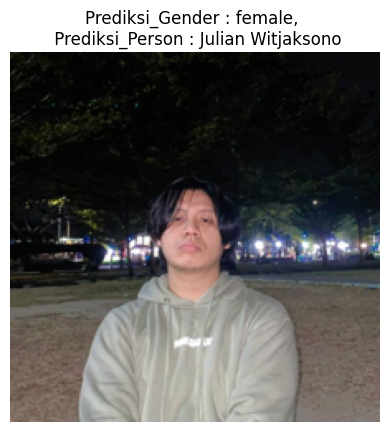

In [24]:
image_path = '/content/352599645_214426504875951_1830760471890480927_n.jpg'
predictions_person = predict_person(person_model, image_path, class_names)
predictions_gender = predict_gender(gender_model, image_path)

img_show = Image.open(image_path).resize((224, 224))
plt.imshow(img_show)
plt.title(f"Prediksi_Gender : {predictions_gender}, \n Prediksi_Person : {predictions_person}")
plt.axis("off")
plt.show()

In [ ]:
import os

image_files = [os.path.join(predict, f) for f in os.listdir(predict) if os.path.isfile(os.path.join(predict, f)) and f.endswith(('.jpeg', '.jpg', '.png'))]

num_rows = 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4*num_rows))

for i in range(num_cols):
    image_path = image_files[i]
    predictions_person = predict_person(person_model, image_path, class_names)
    predictions_gender = predict_gender(gender_model, image_path)

    img_show = Image.open(image_path).resize((224, 224))
    axes[i].imshow(img_show)
    axes[i].set_title(f"Gender: {predictions_gender} \n Name: {predictions_person}")
    axes[i].axis("off")

plt.show()